In [18]:
# Preliminaries  
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import matplotlib as mpl              # graphics parameters
plt.style.use('ggplot')
import xlrd
%matplotlib inline 

---
# Class 08-02. Joining Data

Now, let's say we wanted to join a bunch of data together.  
We have a lot of countries here, And we'd like to know how much of their wealth is concentrated in these rich people.

In [16]:
df = pd.read_excel("Data02_rich_people.xlsx")

## What do we combine it with?

I'm going to get my GDP data from [this web site](http://statisticstimes.com/economy/world-gdp-ranking.php).

We could manually say okay, so A. Jerrold Perenchio	has 2.6 billion dollars, and USA's GDP was 17.418 trillion (17418 billion), so he's at about 0.015% of the GDP. **But we are lazy, so we want the computer to do it.** In order to do that, though, we need to **merge that information into our existing dataset.**

I'm also too lazy to look up the GDP for every country, so I'm just going to pick the top ten.

In [20]:
df['countrycode'].value_counts().head(10)

USA    903
DEU    160
CHN    153
RUS    119
JPN     96
BRA     81
HKG     77
FRA     72
GBR     65
IND     63
Name: countrycode, dtype: int64

In [22]:
# Make a list of dictionaries
country_gdp = [
    { 'country': 'USA', 'gdp': 17.418 },
    { 'country': 'DEU', 'gdp': 3.859 },
    { 'country': 'CHN', 'gdp': 10.380 },
    { 'country': 'RUS', 'gdp': 1.857 },
    { 'country': 'JPN', 'gdp': 4.616 },
    { 'country': 'BRA', 'gdp': 2.353 },
    { 'country': 'HKG', 'gdp': 0.289 },
    { 'country': 'FRA', 'gdp': 2.846 },
    { 'country': 'GBR', 'gdp': 2.945 },
    { 'country': 'IND', 'gdp': 2.049 }
]

# Convert it into a DataFrame
gdp_df = pd.DataFrame(country_gdp)
gdp_df

,country,gdp
0,USA,17.418
1,DEU,3.859
2,CHN,10.380
3,RUS,1.857
4,JPN,4.616
5,BRA,2.353
6,HKG,0.289
7,FRA,2.846
8,GBR,2.945
9,IND,2.049


In [23]:
gdp_df['gdp_billions'] = gdp_df['gdp'] * 1000
gdp_df

,country,gdp,gdp_billions
0,USA,17.418,17418.0
1,DEU,3.859,3859.0
2,CHN,10.380,10380.0
3,RUS,1.857,1857.0
4,JPN,4.616,4616.0
5,BRA,2.353,2353.0
6,HKG,0.289,289.0
7,FRA,2.846,2846.0
8,GBR,2.945,2945.0
9,IND,2.049,2049.0


### STEP ONE: Finding a join key

My favorite resource for joining data with `pandas` is [this page](http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html#compare-with-sql-join). It compares everything to SQL JOINs, which *I* understand. You could also check out [this page](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) which I find kind of confusing.

So what we need to do is **match up a column between our two dataframes.**

In [24]:
df.head(1)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,former chairman and CEO,1955.0,1.062180e+13,NaN,represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN


In [25]:
gdp_df.head(1)

,country,gdp,gdp_billions
0,USA,17.418,17418.0


It looks like we're going to be matching up **`countrycode`** from `df` with **`country`** from `gdp_df`.

### STEP TWO: Doing the merge

You merge using **`.merge`**, and then give two parameters: 

* **`left_on`**, the first dataframe's column name to merge on
* **`right_on`**, the second dataframe's column name to merge on


In [26]:
# Since we're only working with 2014's GDP, let's make a variable
# that's only 2014 scores
recent = df[df['year'] == 2014]
recent.head(1)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN


In [27]:
# Let's do the merge
people_with_gdp = recent.merge(gdp_df, left_on='countrycode', right_on='country')

# Look at the top 10
people_with_gdp.sort_values(by='rank').head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,sourceofwealth,notes,notes2,source,source_2,source_3,source_4,country,gdp,gdp_billions
33,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN,USA,17.418,17418.0
484,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN,USA,17.418,17418.0
280,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN,USA,17.418,17418.0
57,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN,USA,17.418,17418.0
93,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN,USA,17.418,17418.0


Hmmm see how rank skips through 1, 4, 5, 6, 6? This is because **we only kept rows we have matches for**. The second wealthiest person is from Mexico, but since we didn't have GDP from Mexico it left. You can see if we just do a simple `.count()`

In [29]:
len(recent)

1653

In [30]:
len(people_with_gdp)

1130

We lost like 500 people! Maybe even if we don't have the GDP of their country we want to keep them?

### Types of joins

Let's just look at our data real quick before I explain the two major types of joins.

In [31]:
# How many rows in our 2014 dataframe?
print("We start with", len(recent))
recent[['rank','name', 'countrycode']].sort_values(by='rank').head(3)

We start with 1653


,rank,name,countrycode
284,1,Bill Gates,USA
348,2,Carlos Slim Helu,MEX
124,3,Amancio Ortega,ESP


### Inner joins

The default kind of join is an **inner** join. It requires you to have a match on the left hand side AND the right hand side.

**If you're in the original dataframe and you don't have a match in the joining dataframe, you disappear.** Watch how Carlos "Slim" Helu and Amancio Ortega both disappear. 

In [33]:
# Inner join must have a match in both tables
inner_join_df = recent.merge(gdp_df, left_on='countrycode', right_on='country')
print("We now have", len(inner_join_df))
inner_join_df[['rank','name', 'countrycode', 'gdp_billions']].sort_values(by='rank').head(3)

We now have 1130


,rank,name,countrycode,gdp_billions
33,1,Bill Gates,USA,17418.0
484,4,Warren Buffett,USA,17418.0
280,5,Larry Ellison,USA,17418.0


### Left join

The other major kind of join is a **left join**. The "left" dataframe (the one you type first), gets to keep its rows, even if there aren't any matches in the joining dataframe.

In [34]:
# Do a left join, we keep everyone even if they don't have a match in the gdp table
left_join_df = recent.merge(gdp_df, left_on='countrycode', right_on='country', how='left')
print("We now have", len(left_join_df))
left_join_df[['rank', 'name','countrycode', 'gdp_billions']].sort_values(by='rank').head(3)

We now have 1653


,rank,name,countrycode,gdp_billions
184,1,Bill Gates,USA,17418.0
226,2,Carlos Slim Helu,MEX,NaN
79,3,Amancio Ortega,ESP,NaN


### A pretty join picture

Did you see this image already? Well, now you have.

![](http://i.imgur.com/7Ssc4l.jpg)

---
# Class 08-01. Pandas Dataframe

A lot of times when you're using pandas you're also going to use matplotlib, and when you're using matplotlib you're also going to be making inline graphics. So why not do it all at once?

In [3]:
df = pd.read_excel("Data02_rich_people.xlsx")

In [2]:
# Preliminaries  
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import matplotlib as mpl              # graphics parameters
plt.style.use('ggplot')
import xlrd
%matplotlib inline   

In [7]:
df.head(2)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,former chairman and CEO,1955.0,1.062180e+13,NaN,represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN


In [8]:
df.columns

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

# Slicing your data

In [9]:
sample = df[df['year'] == 2014][['name', 'countrycode', 'selfmade', 'rank', 'networthusbillion']].sort_values(by='rank').head(8)
sample


,name,countrycode,selfmade,rank,networthusbillion
284,Bill Gates,USA,self-made,1,76.0
348,Carlos Slim Helu,MEX,self-made,2,72.0
124,Amancio Ortega,ESP,self-made,3,64.0
2491,Warren Buffett,USA,self-made,4,58.2
1377,Larry Ellison,USA,self-made,5,48.0
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0
2185,Sheldon Adelson,USA,self-made,8,38.0


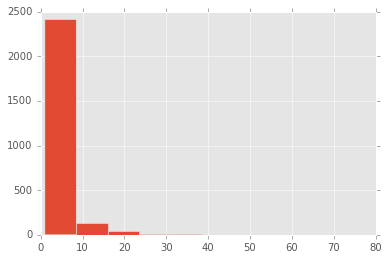

In [10]:
plt.style.use('ggplot')
df['networthusbillion'].hist()

Who is from the USA? There **two different things we can do**. This was a big point of confusion in class

1. We can **list whether someone is from the USA or not.**
2. Or, we can use that list to **select only the people from the USA.**

Let's look at them both, then see how they're used.

In [11]:
sample['countrycode'] == 'USA'

284      True
348     False
124     False
2491     True
1377     True
509      True
381      True
2185     True
Name: countrycode, dtype: bool

This just gave us a list of `True` and `False` values.

* First person? Definitely from the USA.
* Next row? Not from the USA.
* Third person? Not from the USA.
* Fourth? Yes, they're from the USA.

On the other hand, we can also use similar syntax to get a list of every person from the USA.

In [15]:
americans = sample[sample['countrycode'] == 'USA']
americans

,name,countrycode,selfmade,rank,networthusbillion
284,Bill Gates,USA,self-made,1,76.0
2491,Warren Buffett,USA,self-made,4,58.2
1377,Larry Ellison,USA,self-made,5,48.0
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0
2185,Sheldon Adelson,USA,self-made,8,38.0


That one was a two-step process,

1. we got a list of `True`/`False` values (are they from the USA?), then
2. **fed that `True`/`False` list back into the dataframe.**

For every row that's `True`, it let us keep the row. If it was `False`, it doesn't let us keep the row.

## When to use what

Let's say we wanted to select every single row that is from USA, has inherited wealth, and is in the top 10 wealthiest people in the world. If we wanted to do it all on one line, we could!

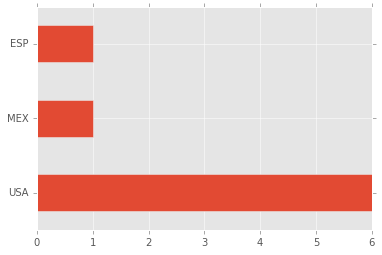

In [17]:
# value counts vs groupby

# groupby() whenever you want aggregate data
# value_counts : count the number of each category
a = sample['countrycode'].value_counts()
a.plot(kind='barh')

countrycode
ESP     64.0
MEX     72.0
USA    300.2
Name: networthusbillion, dtype: float64


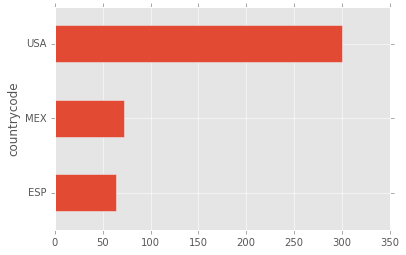

In [12]:
a = sample.groupby('countrycode')['networthusbillion'].sum()
a.plot(kind='barh')
print(a)

In [19]:
sample[(sample['countrycode'] == 'USA') & (sample['selfmade'] == 'inherited') & (sample['rank'] < 10)]

,name,countrycode,selfmade,rank,networthusbillion
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0


That looks *super confusing*. In it we have three separate things we're testing for (a.k.a. getting True/False back)

* `sample['countrycode'] == 'USA'`
* `sample['selfmade'] == 'inherited'`
* `sample['rank'] < 10`

And we're jamming them all into `sample[blah blah]` to get back a dataframe for which all of those are true. It works, but it's ugly.

Again, let's remind ourselves what a piece like that looks like, it's **just a list of True and False values**

In [20]:
sample['countrycode'] == 'USA'

284      True
348     False
124     False
2491     True
1377     True
509      True
381      True
2185     True
Name: countrycode, dtype: bool

If we felt like the code we had before was a little too complicated, we could break it down into manageable, well-named pieces like this:

In [21]:
is_american = sample['countrycode'] == 'USA'
is_inherited = sample['selfmade'] == 'inherited'
is_top_ten = sample['rank'] < 10

sample[is_american & is_inherited & is_top_ten]

,name,countrycode,selfmade,rank,networthusbillion
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0


Let's look at each individual piece.

`is_american`, which is the same thing as `sample['countrycode'] == 'USA'`, is **not** a list of people. It is **not** a dataframe. It is a **list of true and false values**.

In [22]:
is_american

284      True
348     False
124     False
2491     True
1377     True
509      True
381      True
2185     True
Name: countrycode, dtype: bool

It's the same thing with `is_inherited` and `is_top_ten`. It's just a shortcut for me, so I don't have to type out `sample['selfmade'] == 'inherited'`. We can combine them all using `&` to get a list of `True`/`False` values in which every one of those conditions is true

In [23]:
is_american & is_inherited & is_top_ten

284     False
348     False
124     False
2491    False
1377    False
509      True
381      True
2185    False
dtype: bool

Which we can then feed into the dataframe

In [24]:
sample[is_american & is_inherited & is_top_ten]

,name,countrycode,selfmade,rank,networthusbillion
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0


So what I'm saying is, these two things are the same:

### Method One: Breaking into separate readable things

In [13]:
is_american = sample['countrycode'] == 'USA'
is_inherited = sample['selfmade'] == 'inherited'
is_top_ten = sample['rank'] < 10

kochs = sample[is_american & is_inherited & is_top_ten]
kochs

,name,countrycode,selfmade,rank,networthusbillion
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0


### Method Two: Doing it all at once

In [14]:
kochs = sample[(sample['countrycode'] == 'USA') & (sample['selfmade'] == 'inherited') & (sample['rank'] < 10)]
kochs

,name,countrycode,selfmade,rank,networthusbillion
509,David Koch,USA,inherited,6,40.0
381,Charles Koch,USA,inherited,6,40.0


### Make sure you know the difference between these two

* `df['countrycode'] == 'USA'`
* `df[df['countrycode'] == 'USA']`

---
# Class 07. An Introduction to `pandas`


In [1]:
# import pandas, but call it pd. Why? Because that's What People Do.
import pandas as pd

In [3]:
# Now we're going to read in a file.
# We're going to call this df, which means "data frame"

# It isn't in UTF-8 (I saved it from my mac!) so we need to set the encoding
df = pd.read_csv("Data01_NBA-Census.csv", encoding='mac_roman')

**A dataframe is basically a spreadsheet**, except it lives in the world of Python or the statistical programming language R.

### Selecting rows

In [4]:
# Look at the first few rows
df.head()

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No
1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No
2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No
3,"Gladness, Mickell",27,Magic,C,40,"$762,195",83,220,2,2011,7/26/1986,Alabama A&M,"Birmingham, AL",Alabama,US,Black,No
4,"Jefferson, Richard",33,Jazz,F,44,"$11,046,000",79,230,12,2001,6/21/1980,Arizona,"Los Angeles, CA",California,US,Black,No


In [5]:
# Let's look at MORE of the first few rows
df.head(10)

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No
1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No
2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No
3,"Gladness, Mickell",27,Magic,C,40,"$762,195",83,220,2,2011,7/26/1986,Alabama A&M,"Birmingham, AL",Alabama,US,Black,No
4,"Jefferson, Richard",33,Jazz,F,44,"$11,046,000",79,230,12,2001,6/21/1980,Arizona,"Los Angeles, CA",California,US,Black,No
5,"Hill, Solomon",22,Pacers,F,9,"$1,246,680",79,220,0,2013,3/18/1991,Arizona,"Los Angeles, CA",California,US,Black,No
6,"Budinger, Chase",25,Timberwolves,F,10,"$5,000,000",79,218,4,2009,5/22/1988,Arizona,"Encinitas, CA",California,US,White,No
7,"Williams, Derrick",22,Timberwolves,F,7,"$5,016,960",80,241,2,2011,5/25/1991,Arizona,"La Mirada, CA",California,US,Black,No
8,"Hill, Jordan",26,Lakers,F/C,27,"$3,563,600",82,235,1,2012,7/27/1987,Arizona,"Newberry, SC",South Carolina,US,Black,No
9,"Frye, Channing",30,Suns,F/C,8,"$6,500,000",83,245,8,2005,5/17/1983,Arizona,"White Plains, NY",New York,US,Black,No


But maybe we want to make a basketball joke and see the **final four?**

In [6]:
# Let's look at the final few rows
df.tail(4)

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
524,"Landry, Marcus",27,Lakers,F,14,"$788,872",79,225,17,1996,11/1/1985,Wisconsin,"Milwaukee, WI",Wisconsin,US,Black,No
525,"Harris, Devin",30,Mavericks,G,20,"$854,389",75,192,9,2004,2/27/1983,Wisconsin,"Milwaukee, WI",Wisconsin,US,Black,No
526,"West, David",33,Pacers,F,21,"$12,000,000",81,250,10,2003,8/29/1980,Xavier,"Teaneck, NJ",New Jersey,US,Black,No
527,"Crawford, Jordan",24,Celtics,G,27,"$2,162,419",76,195,3,2010,10/23/1988,Xavier,"Detroit, MI",Michigan,US,Black,No


So yes, `head` and `tail` work kind of like the terminal commands. That's nice, I guess.

But maybe we're incredibly demanding (which we are) and we want, say, **the 6th through the 8th row** (which we do). Don't worry (which I know you were), we can do that, too.

In [7]:
# Show the 6th through the 8th rows
df[5:8]

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
5,"Hill, Solomon",22,Pacers,F,9,"$1,246,680",79,220,0,2013,3/18/1991,Arizona,"Los Angeles, CA",California,US,Black,No
6,"Budinger, Chase",25,Timberwolves,F,10,"$5,000,000",79,218,4,2009,5/22/1988,Arizona,"Encinitas, CA",California,US,White,No
7,"Williams, Derrick",22,Timberwolves,F,7,"$5,016,960",80,241,2,2011,5/25/1991,Arizona,"La Mirada, CA",California,US,Black,No


It's kind of like an array, right? Except where in an array we'd say `df[0]` this time we need to give it two numbers, the start and the end.

# Selecting columns

In [8]:
# Get the names of the columns, just because
df.columns

Index(['Name', 'Age', 'Team', 'POS', '#', '2013 $', 'Ht (In.)', 'WT', 'EXP',
       '1st Year', 'DOB', 'School', 'City',
       'State (Province, Territory, Etc..)', 'Country', 'Race', 'HS Only'],
      dtype='object')

In [9]:
# If we want to be "correct" we add .values on the end of it
df.columns.values

array(['Name', 'Age', 'Team', 'POS', '#', '2013 $', 'Ht (In.)', 'WT',
       'EXP', '1st Year', 'DOB', 'School', 'City',
       'State (Province, Territory, Etc..)', 'Country', 'Race', 'HS Only'], dtype=object)

In [11]:
# Select only name and age
# Combing that with .head() to see not-so-many rows
columns_to_show = ['Name', 'Age']
df[columns_to_show].head()

,Name,Age
0,"Gee, Alonzo",26
1,"Wallace, Gerald",31
2,"Williams, Mo",30
3,"Gladness, Mickell",27
4,"Jefferson, Richard",33


In [12]:
# We can also do this all in one line, even though it starts looking ugly
# (unlike the cute bears pandas looks ugly pretty often)
df[['Name', 'Age']].head()

,Name,Age
0,"Gee, Alonzo",26
1,"Wallace, Gerald",31
2,"Williams, Mo",30
3,"Gladness, Mickell",27
4,"Jefferson, Richard",33


**NOTE:** That was not `df['Name', 'Age']`, it was `df[['Name', 'Age]]`. You'll definitely type it wrong all of the time. When things break with pandas it's probably because you forgot to put in a million brackets.

# Describing your data

A powerful tool of pandas is being able to select a portion of your data, *because who ordered all that data anyway*.

In [13]:
df.head()

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No
1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No
2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No
3,"Gladness, Mickell",27,Magic,C,40,"$762,195",83,220,2,2011,7/26/1986,Alabama A&M,"Birmingham, AL",Alabama,US,Black,No
4,"Jefferson, Richard",33,Jazz,F,44,"$11,046,000",79,230,12,2001,6/21/1980,Arizona,"Los Angeles, CA",California,US,Black,No


I want to know how **many people are in each position**. Luckily, pandas can tell me!

In [14]:
# Grab the POS column, and count the different values in it.
df['POS'].value_counts()

G      175
F      142
F/C     74
G/F     70
C       67
Name: POS, dtype: int64

**Now that was a little weird, yes** - we used `df['POS']` instead of `df[['POS']]` when viewing the data's details.

But now I'm curious about numbers: **how old is everyone?** Maybe we could, I don't know, get some statistics about age? Some statistics to **describe** age?

In [15]:
# Summary statistics for Age
df['Age'].describe()

count    528.000000
mean      26.242424
std        4.178868
min       18.000000
25%       23.000000
50%       25.000000
75%       29.000000
max       39.000000
Name: Age, dtype: float64

In [16]:
# That's pretty good. Does it work for everything? How about the money?
df['2013 $'].describe()

count     528
unique    308
top       n/a
freq       43
Name: 2013 $, dtype: object

Unfortunately because that has dollar signs and commas it's thought of as a string. **We'll fix it in a second,** but let's try describing one more thing.

In [17]:
# Doing more describing
df['Ht (In.)'].describe()

count    528.000000
mean      79.119318
std        3.431488
min       69.000000
25%       77.000000
50%       80.000000
75%       82.000000
max       87.000000
Name: Ht (In.), dtype: float64

That's stupid, though, what's an inch even look like? What's 80 inches? I don't have a clue. If only there were some wa to manipulate our data.

# Manipulating data

Oh wait there is, HA HA HA.

In [18]:
# Take another look at our inches, but only the first few
df['Ht (In.)'].head()

0    78
1    79
2    73
3    83
4    79
Name: Ht (In.), dtype: int64

In [19]:
# Divide those inches by 12
df['Ht (In.)'].head() / 12

0    6.500000
1    6.583333
2    6.083333
3    6.916667
4    6.583333
Name: Ht (In.), dtype: float64

In [8]:
# Let's divide ALL of them by 12
feet = df['Ht (In.)'] / 12
feet

0      6.500000
1      6.583333
2      6.083333
3      6.916667
4      6.583333
5      6.583333
6      6.583333
7      6.666667
8      6.833333
9      6.916667
10     6.250000
11     6.166667
12     6.250000
13     6.500000
14     6.833333
15     6.666667
16     6.750000
17     6.416667
18     6.500000
19     6.083333
20     6.083333
21     6.583333
22     6.583333
23     6.083333
24     6.750000
25     6.583333
26     6.916667
27     6.833333
28     6.250000
29     6.833333
         ...   
498    6.000000
499    6.166667
500    6.000000
501    6.916667
502    7.083333
503    6.500000
504    6.250000
505    5.750000
506    5.750000
507    6.500000
508    6.500000
509    6.500000
510    6.833333
511    6.583333
512    6.250000
513    6.666667
514    6.916667
515    6.750000
516    6.750000
517    6.583333
518    6.750000
519    6.416667
520    6.250000
521    6.416667
522    6.916667
523    6.833333
524    6.583333
525    6.250000
526    6.750000
527    6.333333
Name: Ht (In.), dtype: f

In [21]:
# Can we get statistics on those?
feet.describe()

count    528.000000
mean       6.593277
std        0.285957
min        5.750000
25%        6.416667
50%        6.666667
75%        6.833333
max        7.250000
Name: Ht (In.), dtype: float64

In [22]:
# Let's look at our original data again
df.head(2)

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only
0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No
1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No


Okay that was nice but unfortunately we can't do anything with it. It's just sitting there, separate from our data. If this were normal code we could do `blahblah['feet'] = blahblah['Ht (In.)'] / 12`, but since this is pandas, we can't. Right? **Right?**

In [23]:
# Store a new column
df['feet'] = df['Ht (In.)'] / 12
df.head()

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only,feet
0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No,6.500000
1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No,6.583333
2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No,6.083333
3,"Gladness, Mickell",27,Magic,C,40,"$762,195",83,220,2,2011,7/26/1986,Alabama A&M,"Birmingham, AL",Alabama,US,Black,No,6.916667
4,"Jefferson, Richard",33,Jazz,F,44,"$11,046,000",79,230,12,2001,6/21/1980,Arizona,"Los Angeles, CA",California,US,Black,No,6.583333


That's cool, maybe we could do the same thing with their salary? Take out the $ and the , and convert it to an integer?

In [24]:
# Can't just use .replace
df['2013 $'].head().replace("$","")

0     $3,250,000
1    $10,105,855
2     $2,652,000
3       $762,195
4    $11,046,000
Name: 2013 $, dtype: object

In [12]:
sample_line = df['2013 $'].head().str
print(sample_line)
# http://pandas.pydata.org/pandas-docs/version/0.17.0/api.html#string-handling
# Series.str can be used to access the values of the series as strings and apply several methods to it. 
# These can be acccessed like Series.str.<function/property>.

In [25]:
# Need to use this weird .str thing
df['2013 $'].head().str.replace("$","")

0     3,250,000
1    10,105,855
2     2,652,000
3       762,195
4    11,046,000
Name: 2013 $, dtype: object

In [26]:
# Can't just immediately replace the , either
df['2013 $'].head().str.replace("$","").replace(",","")

0     3,250,000
1    10,105,855
2     2,652,000
3       762,195
4    11,046,000
Name: 2013 $, dtype: object

In [27]:
# Need to use the .str thing before EVERY string method
df['2013 $'].head().str.replace("$","").str.replace(",","")

0     3250000
1    10105855
2     2652000
3      762195
4    11046000
Name: 2013 $, dtype: object

In [28]:
# Describe still doesn't work.
df['2013 $'].head().str.replace("$","").str.replace(",","").describe()

count            5
unique           5
top       11046000
freq             1
Name: 2013 $, dtype: object

In [29]:
# Let's convert it to an integer using .astype(int) before we describe it
df['2013 $'].head().str.replace("$","").str.replace(",","").astype(int).describe()

count    5.000000e+00
mean     5.563210e+06
std      4.679007e+06
min      7.621950e+05
25%      2.652000e+06
50%      3.250000e+06
75%      1.010586e+07
max      1.104600e+07
Name: 2013 $, dtype: float64

In [30]:
df['2013 $'].head().str.replace("$","").str.replace(",","").astype(int)

0     3250000
1    10105855
2     2652000
3      762195
4    11046000
Name: 2013 $, dtype: int32

In [31]:
# Maybe we can just make them millions?
df['2013 $'].head().str.replace("$","").str.replace(",","").astype(int) / 1000000

0     3.250000
1    10.105855
2     2.652000
3     0.762195
4    11.046000
Name: 2013 $, dtype: float64

In [32]:
# Unfortunately one is "n/a" which is going to break our code, so we can make n/a be 0
df['2013 $'].str.replace("$","").str.replace(",","").str.replace("n/a", "0").astype(int) / 1000000

0       3.250000
1      10.105855
2       2.652000
3       0.762195
4      11.046000
5       1.246680
6       5.000000
7       5.016960
8       3.563600
9       6.500000
10      3.135000
11      5.625313
12      0.000000
13     12.868632
14      0.000000
15      0.792377
16      1.750000
17     13.701250
18      0.510000
19      0.884293
20      0.788872
21     21.466718
22      1.186459
23      0.884293
24      0.788872
25      0.788872
26      1.082520
27      4.469548
28      0.490180
29      1.399507
         ...    
498    18.668431
499     8.000000
500     0.951463
501    10.361446
502     6.500000
503     1.160040
504     0.000000
505     0.884293
506     2.016000
507     2.678640
508     0.225479
509     0.788872
510     0.788872
511     2.317920
512     3.202920
513     0.854389
514     0.000000
515     0.884293
516     6.500000
517     6.500000
518     1.660257
519     5.225000
520     0.490180
521     0.490180
522     2.676000
523     0.900000
524     0.788872
525     0.8543

In [33]:
# Remove the .head() piece and save it back into the dataframe
df['millions'] = df['2013 $'].str.replace("$","").str.replace(",","").str.replace("n/a","0").astype(int) / 1000000
df.head()

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only,feet,millions
0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No,6.500000,3.250000
1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No,6.583333,10.105855
2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No,6.083333,2.652000
3,"Gladness, Mickell",27,Magic,C,40,"$762,195",83,220,2,2011,7/26/1986,Alabama A&M,"Birmingham, AL",Alabama,US,Black,No,6.916667,0.762195
4,"Jefferson, Richard",33,Jazz,F,44,"$11,046,000",79,230,12,2001,6/21/1980,Arizona,"Los Angeles, CA",California,US,Black,No,6.583333,11.046000


In [34]:
df.describe()

,Age,Ht (In.),WT,EXP,1st Year,feet,millions
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,26.242424,79.119318,221.206439,4.772727,2008.227273,6.593277,3.818379
std,4.178868,3.431488,27.943169,4.325628,4.325628,0.285957,4.728437
min,18.000000,69.000000,20.000000,0.000000,1995.000000,5.750000,0.000000
25%,23.000000,77.000000,200.000000,1.000000,2005.000000,6.416667,0.816844
50%,25.000000,80.000000,220.000000,4.000000,2009.000000,6.666667,1.711620
75%,29.000000,82.000000,240.000000,8.000000,2012.000000,6.833333,5.000000
max,39.000000,87.000000,290.000000,18.000000,2013.000000,7.250000,30.453805


The average basketball player makes 3.8 million dollars and is a little over six and a half feet tall.

But who cares about those guys? I don't care about those guys. They're boring. I want the real rich guys!

# Sorting and sub-selecting

In [35]:
# This is just the first few guys in the dataset. Can we order it?
df.head(3)

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only,feet,millions
0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No,6.500000,3.250000
1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No,6.583333,10.105855
2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No,6.083333,2.652000


In [36]:
# Let's try to sort them
df.sort_values(by='millions').head(3)

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only,feet,millions
496,"Johnson, James",26,Hawks,F,13,n/a,81,248,4,2009,2/20/1987,Wake Forest,"Cheyene, WY",Wyoming,US,Black,No,6.750000,0.0
33,"Davies, Brandon",22,Clippers,F,23,n/a,81,235,0,2013,7/25/1991,Brigham Young,"Provo, UT",Utah,US,Black,No,6.750000,0.0
465,"Drew, Larry",23,Heat,G,0,n/a,74,180,0,2013,3/5/1990,UCLA,"Encino, CA",California,US,Black,No,6.166667,0.0


Those guys are making nothing! If only there were a way to sort from high to low, a.k.a. descending instead of ascending.

In [37]:
# It isn't descending = True, unfortunately
df.sort_values(by='millions', ascending=False).head(3)

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only,feet,millions
203,"Bryant, Kobe",35,Lakers,G,24,"$30,453,805",78,205,7,2006,8/23/1978,Lower Merion HS (PA),"Philadelphia, PA",Pennsylvania,US,Black,Yes,6.500000,30.453805
282,"Nowitzki, Dirk",35,Mavericks,F,41,"$22,721,381",84,245,15,1998,6/19/1978,n/a,"Wurzburg, BA",Bavaria,Germany,White,No,7.000000,22.721381
68,"Stoudemire, Amar'e†",30,Knicks,F/C,1,"$21,679,893",83,245,11,2002,11/16/1982,Cypress Creek HS (FL),"Lake Wales, FL",Florida,US,Black,Yes,6.916667,21.679893


In [38]:
# We can use this to find the oldest guys in the league
df.sort_values(by='Age', ascending=False).head(3)

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only,feet,millions
392,"Nash, Steve",39,Lakers,G,10,"$9,300,500",75,178,7,2006,2/7/1974,Santa Clara,"Johannesburg, SA",n/a,South Africa,White,No,6.250000,9.300500
225,"Camby, Marcus",39,Rockets,F/C,21,"$884,293",83,240,17,1996,3/22/1974,Massachusetts,"Hartford, CT",Connecticut,US,Black,No,6.916667,0.884293
23,"Fisher, Derek",39,Thunder,G,6,"$884,293",73,210,17,1996,8/9/1974,Arkansas-Little Rock,"Little Rock, AR",Arkansas,US,Black,No,6.083333,0.884293


In [39]:
# Or the youngest, by taking out 'ascending=False'
df.sort_values(by='Age').head(3)

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only,feet,millions
285,"Antetokounmpo, Giannis",18,Bucks,G/F,34,"$1,792,560",81,205,1,2012,12/16/1994,n/a,Athens,n/a,Greece,Black,No,6.750000,1.79256
174,"Noel, Nerlens",19,76ers,C,4,"$3,171,320",83,228,0,2013,4/10/1994,Kentucky,"Malden, MA",Massachussetts,US,Black,No,6.916667,3.17132
191,"Goodwin, Archie",19,Suns,G,20,"$1,064,400",77,198,0,2013,8/17/1994,Kentucky,"Little Rock, AR",Arkansas,US,Black,No,6.416667,1.06440


But sometimes instead of just looking at them, I want to do stuff with them. Play some games with them! Dunk on them~ `describe` them! And we don't want to dunk on everyone, only the players above 7 feet tall.

First, we need to check out **boolean things.**

In [40]:
# Get a big long list of True and False for every single row.
df['feet'] > 7

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
498    False
499    False
500    False
501    False
502     True
503    False
504    False
505    False
506    False
507    False
508    False
509    False
510    False
511    False
512    False
513    False
514    False
515    False
516    False
517    False
518    False
519    False
520    False
521    False
522    False
523    False
524    False
525    False
526    False
527    False
Name: feet, dtype: bool

In [41]:
# We could use value counts if we wanted
above_seven_feet = df['feet'] > 7
above_seven_feet.value_counts()

False    518
True      10
Name: feet, dtype: int64

In [42]:
# But we can also apply this to every single row to say whether YES we want it or NO we don't
df['feet'].head() > 7

0    False
1    False
2    False
3    False
4    False
Name: feet, dtype: bool

In [43]:
# Instead of putting column names inside of the brackets, we instead
# put the True/False statements. It will only return the players above 
# seven feet tall
df[df['feet'] > 7]

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only,feet,millions
54,"Thabeet, Hasheem",26,Thunder,C,34,"$1,200,000",87,263,4,2009,2/16/1987,Connecticut,Dar es Salaam,n/a,Tanzania,Black,No,7.250000,1.200000
76,"Chandler, Tyson",31,Knicks,C,6,"$14,100,538",85,240,12,2001,10/2/1982,Dominguez HS (CA),"Hanford, CA",California,US,Black,Yes,7.083333,14.100538
120,"Hibbert, Roy",26,Pacers,C,55,"$14,283,844",86,280,5,2008,12/11/1986,Georgetown,"New York City, NY",New York,US,Black,No,7.166667,14.283844
145,"Leonard, Meyers",21,Trail Blazers,C,11,"$2,222,160",85,245,1,2012,2/27/1992,Illinois,"Robinson, IIL",Illinois,US,White,No,7.083333,2.222160
221,"Len, Alex",20,Suns,C,21,"$3,492,720",85,255,0,2013,6/16/1993,Maryland,Antratsy,n/a,Ukraine,White,No,7.083333,3.492720
274,"Gobert, Rudy",21,Jazz,C,27,"$1,078,800",85,235,0,2013,6/26/1992,n/a,Saint-Quentin,Aisne,France,Mixed,No,7.083333,1.078800
297,"Mozgov, Timofey",27,Nuggets,C,25,"$4,400,000",85,250,3,2010,7/16/1986,n/a,St. Petersburg,n/a,Russia,White,No,7.083333,4.400000
303,"Gasol, Marc",28,Grizzlies,C,33,"$14,860,524",85,265,5,2008,1/29/1985,n/a,Barcelona,n/a,Spain,Hispanic,No,7.083333,14.860524
316,"Kuzmi?, Ognjen",23,Warriors,C,1,"$490,180",85,231,0,2013,5/16/1990,n/a,Doboj,n/a,Yugoslavia,White,No,7.083333,0.490180
502,"Hawes, Spencer",25,76ers,C,0,"$6,500,000",85,245,6,2007,4/28/1988,Washington,"Seattle, WA",Washington,US,White,No,7.083333,6.500000


In [44]:
# Or only the guards
df[df['POS'] == 'G']

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only,feet,millions
2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No,6.083333,2.652000
10,"Bayless, Jerryd",25,Grizzlies,G,7,"$3,135,000",75,200,5,2008,8/20/1988,Arizona,"Phoenix, AZ",Arizona,US,Black,No,6.250000,3.135000
11,"Terry, Jason",36,Nets,G,31,"$5,625,313",74,180,14,1999,9/15/1977,Arizona,"Seattle, WA",Washington,US,Black,No,6.166667,5.625313
12,"Fogg, Kyle",23,Nuggets,G,6,n/a,75,183,0,2013,1/27/1990,Arizona,"Brea, CA",California,US,Black,No,6.250000,0.000000
17,"Harden, James",24,Rockets,G,13,"$13,701,250",77,220,4,2009,8/26/1989,Arizona State,"Los Angeles, CA",California,US,Black,No,6.416667,13.701250
19,"Pargo, Jannero",33,Bobcats,G,5,"$884,293",73,185,11,2002,10/22/1979,Arkansas,"Chicago, IL",Illinois,US,Black,No,6.083333,0.884293
20,"Beverley, Patrick",25,Rockets,G,2,"$788,872",73,185,5,2008,7/12/1988,Arkansas,"Chicago, IL",Illinois,US,Black,No,6.083333,0.788872
23,"Fisher, Derek",39,Thunder,G,6,"$884,293",73,210,17,1996,8/9/1974,Arkansas-Little Rock,"Little Rock, AR",Arkansas,US,Black,No,6.083333,0.884293
28,"Clark, Ian",22,Jazz,G,21,"$490,180",75,175,0,2013,3/7/1991,Belmont,"Memphis, TN",Tennessee,US,Black,No,6.250000,0.490180
30,"Jackson, Reggie",23,Thunder,G,15,"$1,260,360",75,208,2,2011,4/16/1990,Boston College,Pordenone,n/a,Italy,Black,No,6.250000,1.260360


In [45]:
# Or only the guards who make more than 15 million
df[(df['POS'] == 'G') & (df['millions'] > 15)]

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only,feet,millions
147,"Williams, Deron",29,Nets,G,8,"$18,466,130",75,209,8,2005,6/26/1984,Illinois,"Parkersburg, WV",West Virginia,US,Black,No,6.250000,18.466130
203,"Bryant, Kobe",35,Lakers,G,24,"$30,453,805",78,205,7,2006,8/23/1978,Lower Merion HS (PA),"Philadelphia, PA",Pennsylvania,US,Black,Yes,6.500000,30.453805
214,"Wade, Dwyane",31,Heat,G,3,"$18,673,000",76,220,10,2003,1/17/1982,Marquette,"Chicago, IL",Illinois,US,Black,No,6.333333,18.673000
227,"Rose, Derrick",25,Bulls,G,1,"$17,632,688",75,190,5,2008,10/4/1988,Memphis,"Chicago, IL",Illinois,US,Black,No,6.250000,17.632688
498,"Paul, Chris",28,Clippers,G,3,"$18,668,431",72,175,8,2005,5/6/1985,Wake Forest,"Forsyth County, NC",North Carolina,US,Black,No,6.000000,18.668431


In [46]:
# It might be easier to break down the booleans into separate variables
is_guard = df['POS'] == 'G'
more_than_fifteen_million = df['millions'] > 15
df[is_guard & more_than_fifteen_million]

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only,feet,millions
147,"Williams, Deron",29,Nets,G,8,"$18,466,130",75,209,8,2005,6/26/1984,Illinois,"Parkersburg, WV",West Virginia,US,Black,No,6.250000,18.466130
203,"Bryant, Kobe",35,Lakers,G,24,"$30,453,805",78,205,7,2006,8/23/1978,Lower Merion HS (PA),"Philadelphia, PA",Pennsylvania,US,Black,Yes,6.500000,30.453805
214,"Wade, Dwyane",31,Heat,G,3,"$18,673,000",76,220,10,2003,1/17/1982,Marquette,"Chicago, IL",Illinois,US,Black,No,6.333333,18.673000
227,"Rose, Derrick",25,Bulls,G,1,"$17,632,688",75,190,5,2008,10/4/1988,Memphis,"Chicago, IL",Illinois,US,Black,No,6.250000,17.632688
498,"Paul, Chris",28,Clippers,G,3,"$18,668,431",72,175,8,2005,5/6/1985,Wake Forest,"Forsyth County, NC",North Carolina,US,Black,No,6.000000,18.668431


In [47]:
# We can save this stuff
short_players = df[df['feet'] < 6.5]
short_players

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only,feet,millions
2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No,6.083333,2.652000
10,"Bayless, Jerryd",25,Grizzlies,G,7,"$3,135,000",75,200,5,2008,8/20/1988,Arizona,"Phoenix, AZ",Arizona,US,Black,No,6.250000,3.135000
11,"Terry, Jason",36,Nets,G,31,"$5,625,313",74,180,14,1999,9/15/1977,Arizona,"Seattle, WA",Washington,US,Black,No,6.166667,5.625313
12,"Fogg, Kyle",23,Nuggets,G,6,n/a,75,183,0,2013,1/27/1990,Arizona,"Brea, CA",California,US,Black,No,6.250000,0.000000
17,"Harden, James",24,Rockets,G,13,"$13,701,250",77,220,4,2009,8/26/1989,Arizona State,"Los Angeles, CA",California,US,Black,No,6.416667,13.701250
19,"Pargo, Jannero",33,Bobcats,G,5,"$884,293",73,185,11,2002,10/22/1979,Arkansas,"Chicago, IL",Illinois,US,Black,No,6.083333,0.884293
20,"Beverley, Patrick",25,Rockets,G,2,"$788,872",73,185,5,2008,7/12/1988,Arkansas,"Chicago, IL",Illinois,US,Black,No,6.083333,0.788872
23,"Fisher, Derek",39,Thunder,G,6,"$884,293",73,210,17,1996,8/9/1974,Arkansas-Little Rock,"Little Rock, AR",Arkansas,US,Black,No,6.083333,0.884293
28,"Clark, Ian",22,Jazz,G,21,"$490,180",75,175,0,2013,3/7/1991,Belmont,"Memphis, TN",Tennessee,US,Black,No,6.250000,0.490180
30,"Jackson, Reggie",23,Thunder,G,15,"$1,260,360",75,208,2,2011,4/16/1990,Boston College,Pordenone,n/a,Italy,Black,No,6.250000,1.260360


In [48]:
short_players.describe()

,Age,Ht (In.),WT,EXP,1st Year,feet,millions
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,25.933735,74.909639,193.530120,4.168675,2008.831325,6.242470,3.423839
std,4.286887,1.778056,19.085668,4.059614,4.059614,0.148171,4.122675
min,19.000000,69.000000,20.000000,0.000000,1996.000000,5.750000,0.000000
25%,23.000000,74.000000,185.000000,1.000000,2006.000000,6.166667,0.788872
50%,25.000000,75.000000,195.000000,3.000000,2010.000000,6.250000,1.595675
75%,28.000000,76.000000,205.000000,7.000000,2012.000000,6.333333,4.940940
max,39.000000,77.000000,228.000000,17.000000,2013.000000,6.416667,18.673000


In [49]:
# Maybe we can compare them to taller players?
df[df['feet'] >= 6.5].describe()

,Age,Ht (In.),WT,EXP,1st Year,feet,millions
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,26.383978,81.049724,233.897790,5.049724,2007.950276,6.754144,3.999301
std,4.126674,1.964438,21.439163,4.420146,4.420146,0.163703,4.976573
min,18.000000,78.000000,155.000000,0.000000,1995.000000,6.500000,0.000000
25%,23.000000,79.000000,220.000000,1.000000,2005.000000,6.583333,0.854389
50%,26.000000,81.000000,235.000000,4.000000,2009.000000,6.750000,1.750000
75%,29.000000,83.000000,250.000000,8.000000,2012.000000,6.916667,5.012720
max,39.000000,87.000000,290.000000,18.000000,2013.000000,7.250000,30.453805


# Drawing pictures

Okay okay enough code and enough stupid numbers. I'm visual. I want graphics. **Okay?????** Okay.

In [50]:
df['Age'].head()

0    26
1    31
2    30
3    27
4    33
Name: Age, dtype: int64

In [51]:
# This will scream we don't have matplotlib.
df['Age'].hist()

ImportError: No module named 'matplotlib'

`matplotlib` is a graphing library. It's the Python way to make graphs!

In [52]:
!pip install matplotlib

  Using cached matplotlib-1.5.1-cp35-none-win32.whl
  Using cached pyparsing-2.1.5-py2.py3-none-any.whl
  Using cached cycler-0.10.0-py2.py3-none-any.whl


In [53]:
# this will open up a weird window that won't do anything
df['Age'].hist()

In [54]:
# So instead you run this code
%matplotlib inline

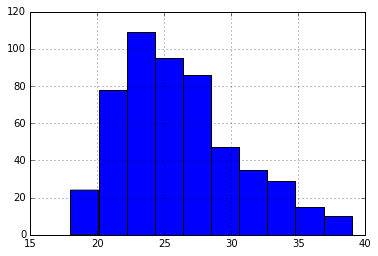

In [55]:
df['Age'].hist()

But that's ugly. There's a thing called ``ggplot`` for R that looks nice. We want to look nice. We want to look like ``ggplot``.

In [56]:
import matplotlib.pyplot as plt
plt.style.available

['seaborn-white',
 'ggplot',
 'seaborn-darkgrid',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-muted',
 'seaborn-paper',
 'seaborn-whitegrid',
 'seaborn-notebook',
 'seaborn-ticks',
 'seaborn-colorblind',
 'fivethirtyeight',
 'grayscale',
 'seaborn-deep',
 'seaborn-bright',
 'dark_background',
 'bmh',
 'seaborn-dark-palette',
 'classic',
 'seaborn-talk',
 'seaborn-dark']

In [57]:
plt.style.use('ggplot')

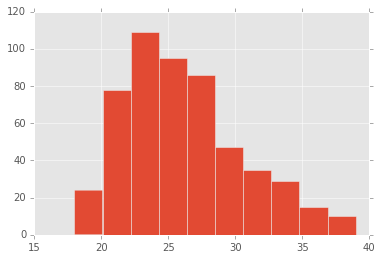

In [58]:
df['Age'].hist()

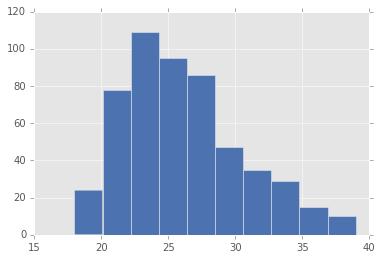

In [59]:
plt.style.use('seaborn-deep')
df['Age'].hist()

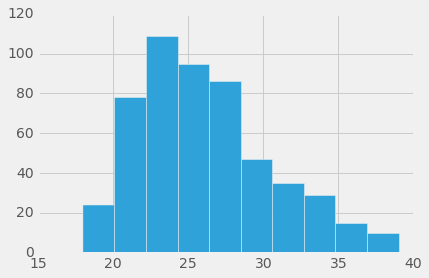

In [60]:
plt.style.use('fivethirtyeight')
df['Age'].hist()

That might look better with a little more customization. So let's customize it.

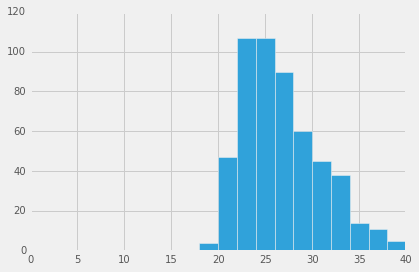

In [61]:
# Pass in all sorts of stuff!
# Most from http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html
# .range() is a matplotlib thing
df['Age'].hist(bins=20, xlabelsize=10, ylabelsize=10, range=(0,40))

I want more graphics! **Do tall people make more money?!?!**

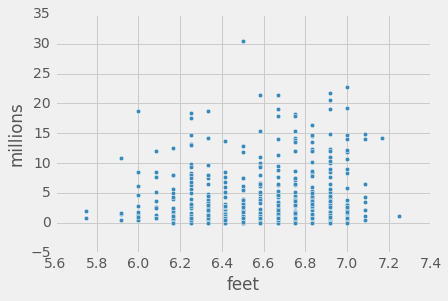

In [62]:
df.plot(kind='scatter', x='feet', y='millions')

In [63]:
df.head()

,Name,Age,Team,POS,#,2013 $,Ht (In.),WT,EXP,1st Year,DOB,School,City,"State (Province, Territory, Etc..)",Country,Race,HS Only,feet,millions
0,"Gee, Alonzo",26,Cavaliers,F,33,"$3,250,000",78,219,4,2009,5/29/1987,Alabama,"Riviera Beach, FL",Florida,US,Black,No,6.500000,3.250000
1,"Wallace, Gerald",31,Celtics,F,45,"$10,105,855",79,220,12,2001,7/23/1982,Alabama,"Sylacauga, AL",Alabama,US,Black,No,6.583333,10.105855
2,"Williams, Mo",30,Trail Blazers,G,25,"$2,652,000",73,195,10,2003,12/19/1982,Alabama,"Jackson, MS",Mississippi,US,Black,No,6.083333,2.652000
3,"Gladness, Mickell",27,Magic,C,40,"$762,195",83,220,2,2011,7/26/1986,Alabama A&M,"Birmingham, AL",Alabama,US,Black,No,6.916667,0.762195
4,"Jefferson, Richard",33,Jazz,F,44,"$11,046,000",79,230,12,2001,6/21/1980,Arizona,"Los Angeles, CA",California,US,Black,No,6.583333,11.046000


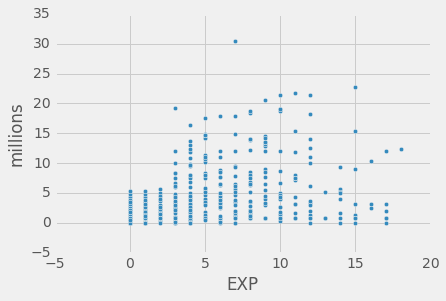

In [64]:
# How does experience relate with the amount of money they're making?
df.plot(kind='scatter', x='EXP', y='millions')

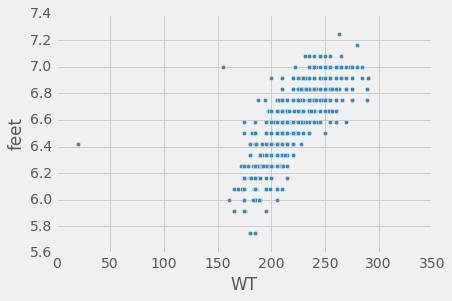

In [65]:
# At least we can assume height and weight are related
df.plot(kind='scatter', x='WT', y='feet')

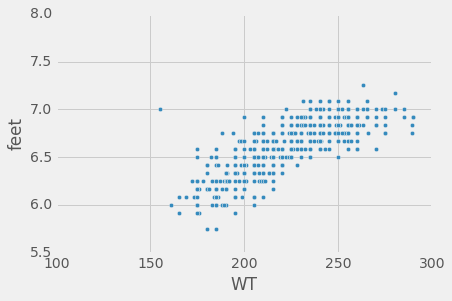

In [66]:
# At least we can assume height and weight are related
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
df.plot(kind='scatter', x='WT', y='feet', xlim=(100,300), ylim=(5.5, 8))

In [67]:
plt.style.use('ggplot')

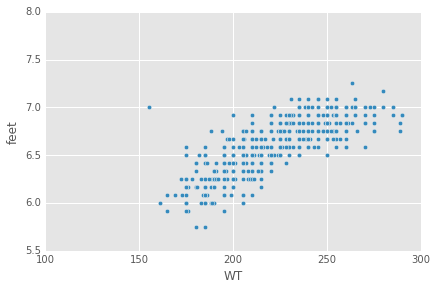

In [68]:
df.plot(kind='scatter', x='WT', y='feet', xlim=(100,300), ylim=(5.5, 8))

(5.5, 8)

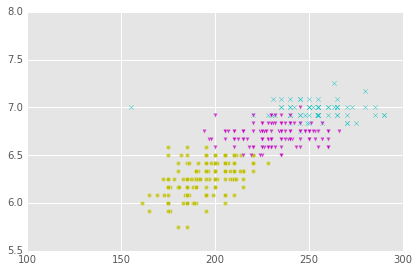

In [69]:
# We can also use plt separately
# It's SIMILAR but TOTALLY DIFFERENT
centers = df[df['POS'] == 'C']
guards = df[df['POS'] == 'G']
forwards = df[df['POS'] == 'F']
plt.scatter(y=centers["feet"], x=centers["WT"], c='c', alpha=0.75, marker='x')
plt.scatter(y=guards["feet"], x=guards["WT"], c='y', alpha=0.75, marker='o')
plt.scatter(y=forwards["feet"], x=forwards["WT"], c='m', alpha=0.75, marker='v')
plt.xlim(100,300)
plt.ylim(5.5,8)